# ***Mobile Price Prediction***
The price of a mobile phone is influenced by various factors such as its battery power,quality of cameras,internal memory,size,imaging quality and RAM. The given dataset is  used to estimate the price range of mobile phones using its various features.
  
battery_power:Battery Power(mAh)\
front_camera_mpixel:Front Camera Megapixels\
int_memory:Internal Memory(GB)\
m_dep:Mobile Depth(cm)\
mobile_wt:Weight of Mobile Phone\
n_cores:Number of cores of processor\
pc:Primary Camera Megapixels\
px_height:Pixel Resolution Height\
px_width:Pixel Resolution Width\
ram:Random Access Memory(MB)\
sc_h:Screen Height(cm)\
sc_w:Screen Width(cm)


## *Importing Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from xgboost import XGBClassifier


## *Importing Data*

In [ ]:
df=pd.read_csv("/content/MobilePrice.csv")

In [ ]:
df.head()

,battery_power,front_camera_mpixels,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,1,7,0.6,188,2,2,20,756,2549,9,7,Medium Cost
1,1021,0,53,0.7,136,3,6,905,1988,2631,17,3,High Cost
2,563,2,41,0.9,145,5,6,1263,1716,2603,11,2,High Cost
3,615,0,10,0.8,131,6,9,1216,1786,2769,16,8,High Cost
4,1821,13,44,0.6,141,2,14,1208,1212,1411,8,2,Medium Cost


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery_power         2000 non-null   int64  
 1   front_camera_mpixels  2000 non-null   int64  
 2   int_memory            2000 non-null   int64  
 3   m_dep                 2000 non-null   float64
 4   mobile_wt             2000 non-null   int64  
 5   n_cores               2000 non-null   int64  
 6   pc                    2000 non-null   int64  
 7   px_height             2000 non-null   int64  
 8   px_width              2000 non-null   int64  
 9   ram                   2000 non-null   int64  
 10  sc_h                  2000 non-null   int64  
 11  sc_w                  2000 non-null   int64  
 12  price_range           2000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 203.2+ KB


In [ ]:
df.isnull().sum()

battery_power           0
front_camera_mpixels    0
int_memory              0
m_dep                   0
mobile_wt               0
n_cores                 0
pc                      0
px_height               0
px_width                0
ram                     0
sc_h                    0
sc_w                    0
price_range             0
dtype: int64

In [ ]:
df.describe()

,battery_power,front_camera_mpixels,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000
std,439.418206,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398
min,501.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000
25%,851.750000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000
50%,1226.000000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000
75%,1615.250000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000
max,1998.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000


In [ ]:
df.price_range.unique()

array(['Medium Cost', 'High Cost', 'Very High Cost', 'Low Cost'],
      dtype=object)

In [ ]:
df.replace({"price_range":{"Low Cost":0,"Medium Cost":1,"High Cost":2,"Very High Cost":3}},inplace=True)

In [ ]:
df.price_range.unique()

array([1, 2, 3, 0])

## *Data Visualization*

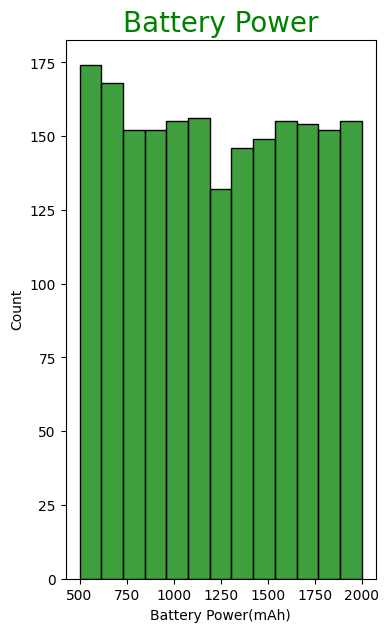

In [ ]:
plt.figure(figsize=(4,7))
sns.histplot(df["battery_power"],color="green")
plt.title("Battery Power",fontsize=20,color="green")
plt.xlabel("Battery Power(mAh)")
plt.ylabel("Count")
plt.show()

<Figure size 400x700 with 0 Axes>

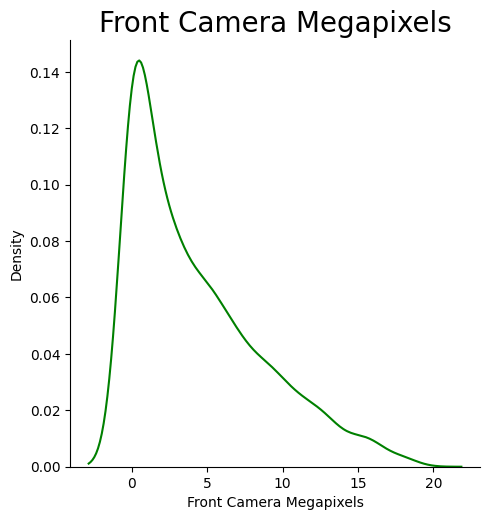

In [ ]:
plt.figure(figsize=(4,7))
sns.displot(df["front_camera_mpixels"],color="green",kind="kde")
plt.title("Front Camera Megapixels",fontsize=20)
plt.xlabel("Front Camera Megapixels")
plt.show()

<Figure size 600x600 with 0 Axes>

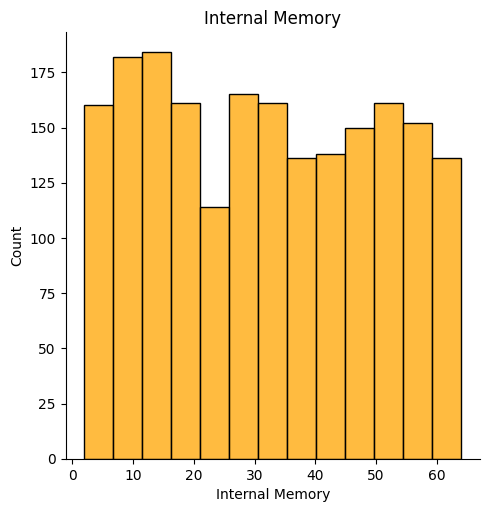

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(df["int_memory"],color="orange")
plt.title("Internal Memory")
plt.xlabel("Internal Memory")
plt.ylabel("Count")
plt.show()

<ipython-input-15-82d5a382afac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["m_dep"])


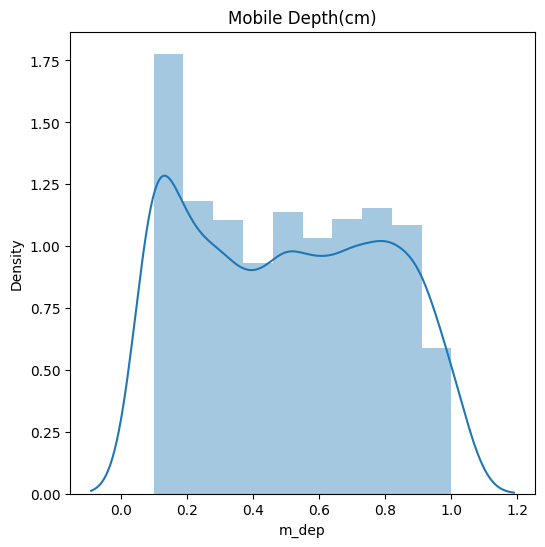

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df["m_dep"])
plt.title("Mobile Depth(cm)")
plt.show()

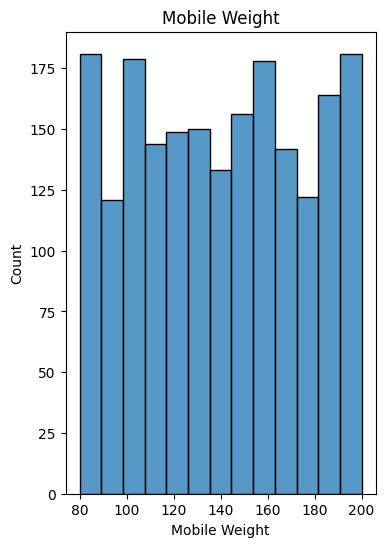

In [ ]:
plt.figure(figsize=(4,6))
sns.histplot(df["mobile_wt"])
plt.title("Mobile Weight")
plt.xlabel("Mobile Weight")
plt.show()

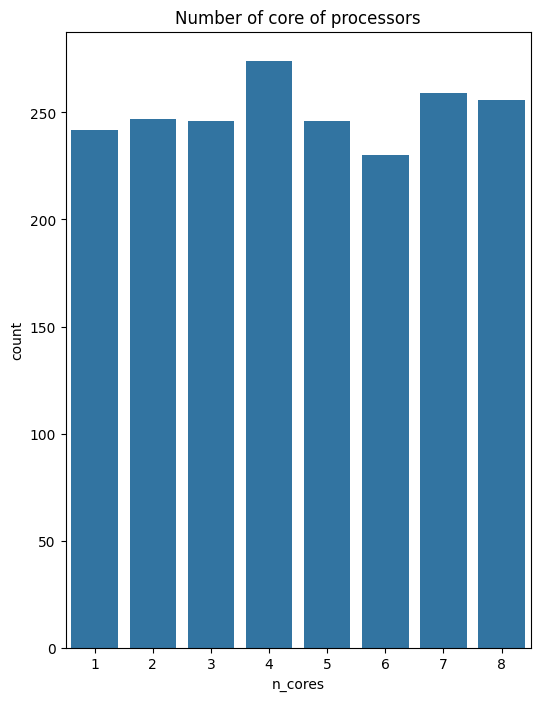

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(x="n_cores",data=df)
plt.title("Number of core of processors")
plt.show()

<ipython-input-16-3719e9e3f413>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ram"])


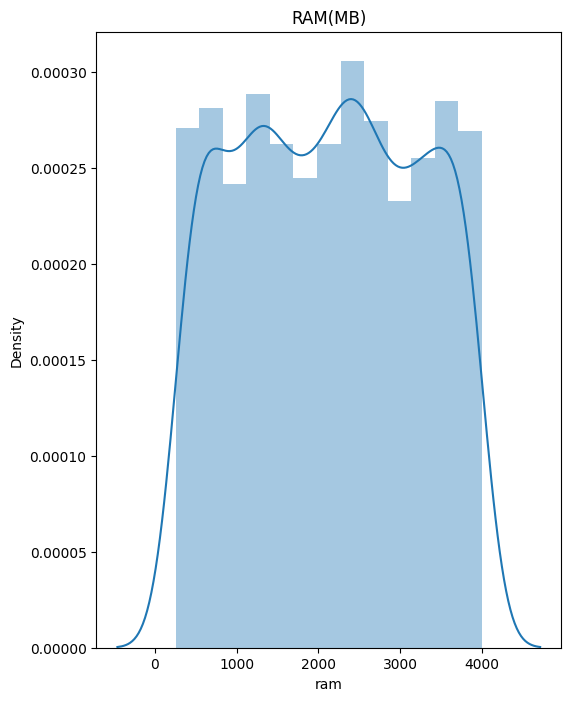

In [ ]:
plt.figure(figsize=(6,8))
sns.distplot(df["ram"])
plt.title("RAM(MB)")
plt.show()

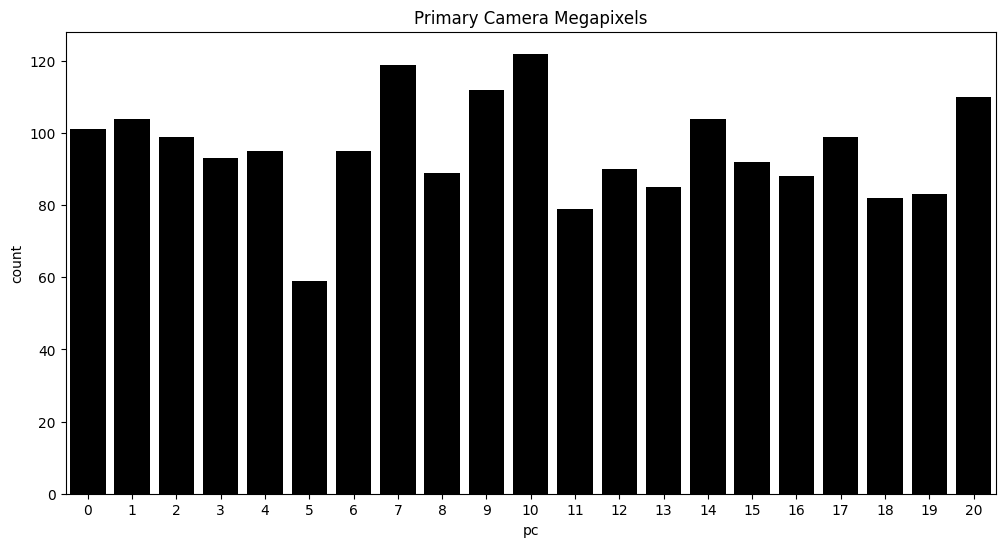

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df,x="pc",color="black")
plt.title("Primary Camera Megapixels")
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(df[""])

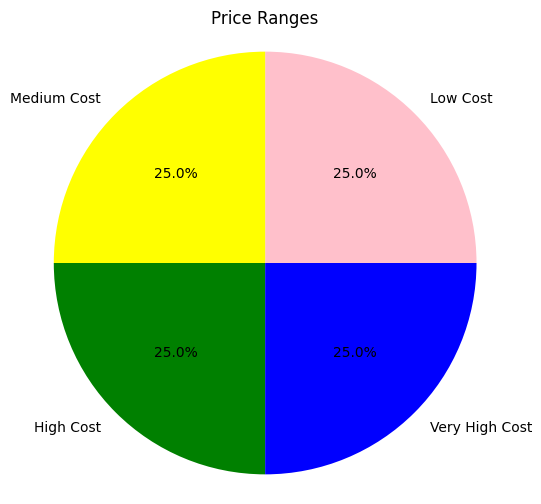

In [ ]:
sizes=df['price_range'].value_counts().values
colors = ['pink', 'yellow',"green","blue"]
plt.figure(figsize=(6, 6))
labels=["Low Cost","Medium Cost","High Cost","Very High Cost"]
plt.pie(sizes, colors=colors,labels=labels, autopct='%1.1f%%',
startangle=0)
plt.axis('equal')
plt.title("Price Ranges")
plt.show()

Equal number of observations are present from each price range.

In [ ]:
corr=df.corr()

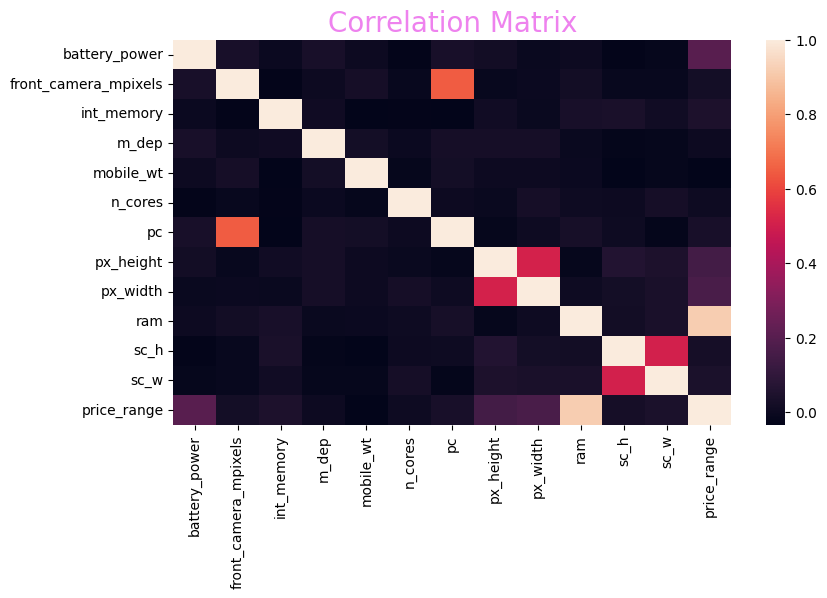

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr())
plt.title("Correlation Matrix",fontsize=20,color="violet")
plt.show()

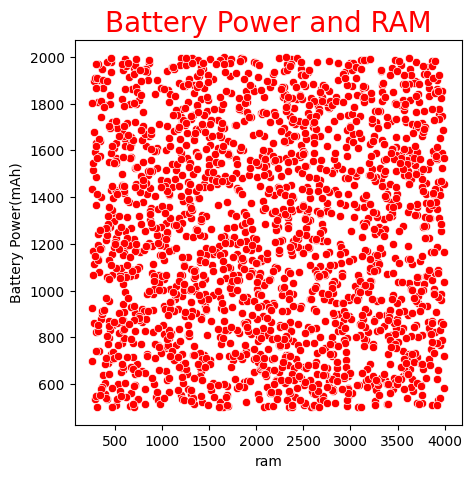

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(y="battery_power",x="ram",data=df,color="red")
plt.title("Battery Power and RAM",fontsize=20,color='red')
plt.ylabel("Battery Power(mAh)")
plt.show()

Increase in RAM doesn't necessarily increase battery power

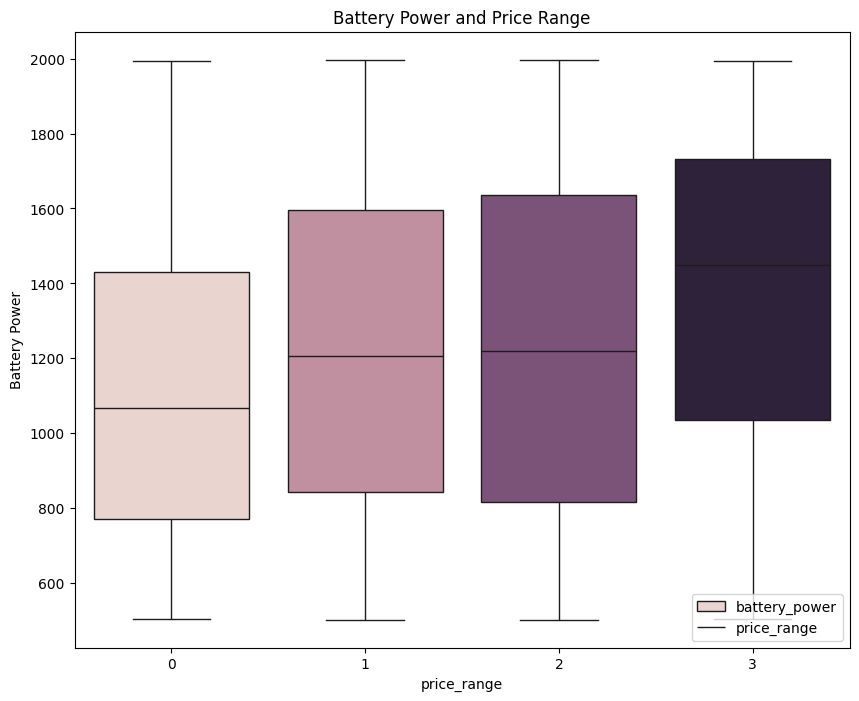

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="price_range",y="battery_power",data=df,hue="price_range")
plt.title("Battery Power and Price Range")
plt.ylabel("Battery Power")
plt.legend(["battery_power","price_range"],loc="lower right")
plt.show()

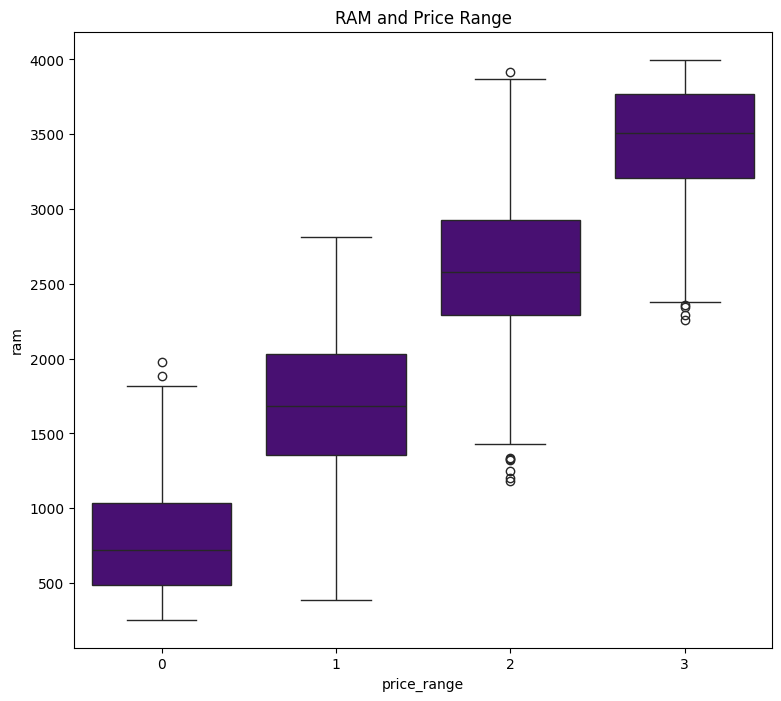

In [ ]:
plt.figure(figsize=(9,8))
sns.boxplot(x="price_range",y="ram",color="indigo",data=df)
plt.title("RAM and Price Range")
plt.show()

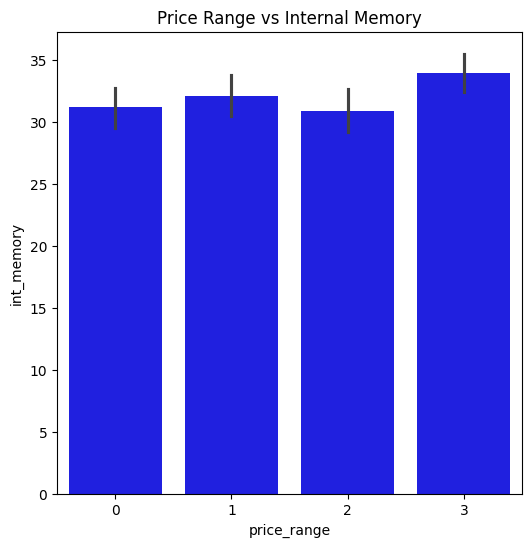

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="price_range",y="int_memory",data=df,color="blue")
plt.title("Price Range vs Internal Memory")
plt.show()

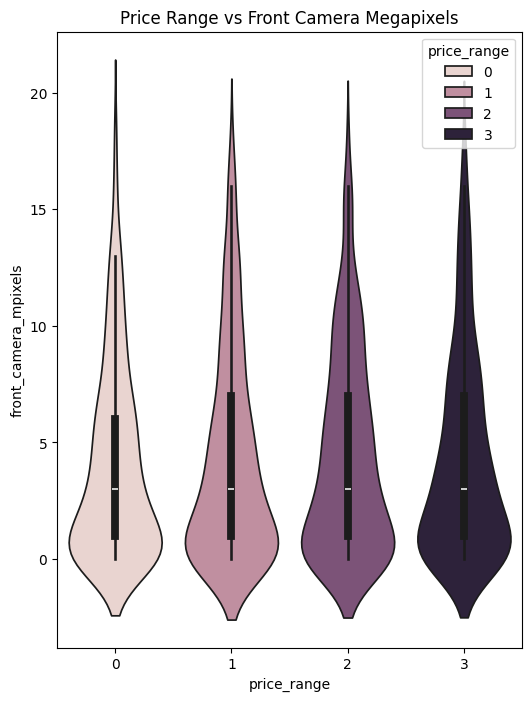

In [ ]:
plt.figure(figsize=(6,8))
sns.violinplot(x="price_range",y="front_camera_mpixels",data=df,hue="price_range")
plt.title("Price Range vs Front Camera Megapixels")
plt.show()

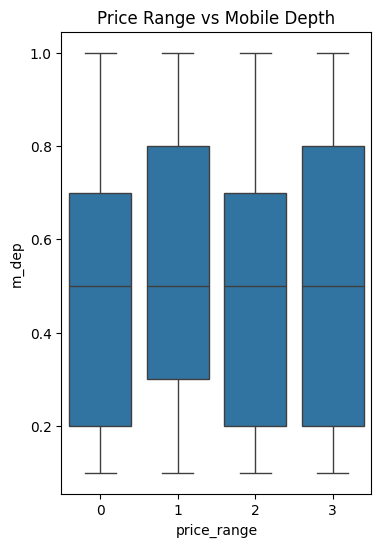

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(x="price_range",y="m_dep",data=df)
plt.title("Price Range vs Mobile Depth")
plt.show()

#*Splitting Train and Test Data*

In [ ]:
X=df.drop(columns="price_range",axis=1)
Y=df["price_range"]

In [ ]:
print(X)

      battery_power  front_camera_mpixels  int_memory  m_dep  mobile_wt  \
0               842                     1           7    0.6        188   
1              1021                     0          53    0.7        136   
2               563                     2          41    0.9        145   
3               615                     0          10    0.8        131   
4              1821                    13          44    0.6        141   
...             ...                   ...         ...    ...        ...   
1995            794                     0           2    0.8        106   
1996           1965                     0          39    0.2        187   
1997           1911                     1          36    0.7        108   
1998           1512                     4          46    0.1        145   
1999            510                     5          45    0.9        168   

      n_cores  pc  px_height  px_width   ram  sc_h  sc_w  
0           2   2         20       756  

In [ ]:
print(Y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=20)

In [ ]:
print(X_train.shape,X_test.shape)

(1400, 12) (600, 12)


In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Individual Classifiers

In [ ]:
lr=LogisticRegression(random_state=20)
rf=RandomForestClassifier(random_state=20)
dt=DecisionTreeClassifier(random_state=20)
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(kernel="linear",probability=True,random_state=20)
nb=GaussianNB()
xgb=XGBClassifier(random_state=20)

# Ensemble


In [ ]:
ensemble=VotingClassifier(estimators=[
    ("lr",lr),
    ("rf",rf),
    ("dt",dt),
    ("knn",knn),
    ("svm",svm),
    ("nb",nb),
    ("xgb",xgb)
],voting="soft")

In [ ]:
ensemble.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=20)),
                             ('rf', RandomForestClassifier(random_state=20)),
                             ('dt', DecisionTreeClassifier(random_state=20)),
                             ('knn', KNeighborsClassifier()),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=20)),
                             ('nb', GaussianNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsam...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=20, ...))],
                 voting='soft')

In [ ]:
test_prediction=ensemble.predict(X_test)
test_accuracy=accuracy_score(Y_test,test_prediction)
print("Ensemble Accuracy: ",test_accuracy)

Ensemble Accuracy:  0.925


#                                                   User Interface


In [ ]:
battery_power=int(input("Enter Battery Power(mAh):   "))
front_camera=int(input("Enter Front Camera Megapixels:   "))
int_memory=int(input("Enter Internal Memory(GB):   "))
m_depth=float(input("Enter Mobile Depth(cm):   "))
m_wt=int(input("Enter Mobile Weight:   "))
n_core=int(input("Enter Number of Cores of Processor:   "))
pc=int(input("Enter Primary Camera Megapixels:   "))
px_height=int(input("Enter Pixel Resolution Height:   "))
px_width=int(input("Enter Pixel Resolution Width:   "))
ram=int(input("Enter RAM(MB):   "))
sc_h=int(input("Enter Screen Height(cm):   "))
sc_w=int(input("Enter Screen Width(cm):   "))



Enter Battery Power(mAh):   842
Enter Front Camera Megapixels:   1
Enter Internal Memory(GB):   7
Enter Mobile Depth(cm):   0.6
Enter Mobile Weight:   188
Enter Number of Cores of Processor:   2
Enter Primary Camera Megapixels:   2
Enter Pixel Resolution Height:   20
Enter Pixel Resolution Width:   756
Enter RAM(MB):   2549
Enter Screen Height(cm):   9
Enter Screen Width(cm):   7


# Prediction

In [ ]:
input=(battery_power,front_camera,int_memory,m_depth,m_wt,n_core,pc,px_height,px_width,ram,sc_h,sc_w)
inputn=np.asarray(input)
reshaped=inputn.reshape(1,-1)
scaled=scaler.fit_transform(reshaped)
prediction=ensemble.predict(reshaped)
print(prediction[0])

3


In [ ]:
price={0:"The price is between 1000 and 10000",
         1:"The price is between 10001 and 15000",
         2:"The price is between 15001 and 20000",
         3:"The price is greater than 20000"}
pricelist=[0,1,2,3]
print(price[pricelist[prediction[0]]])


The price is greater than 20000
